## Python and Jupyter notebook basics

In [1]:
# Declaring and assigning a variable
number = 3

# Defining a function
def add(n, amount = 1):
    return n + amount

# importing a module (library)
import pandas as pd

In [ ]:
# Ability to access the declared objects in the whole notebook

print(f'The declared number is {number}')
print(f'Adding 5 to the number {add(number, 5)}')
print(f'Type of pd is {type(pd)}')

In [ ]:
# The last line of the cell will be printed

number

#### Common python data types and operations

In [ ]:
# List
myList = [1, 2, 3, 4]

# Iteration
s = 0
for n in myList:
    s = s + n

print(f'Sum is {s}')

In [ ]:
# Tuple
myTuple = (1, 2, 'hi')

a, b, c = myTuple
print(f'a is {a}, b is {b} and c is {c}')

In [ ]:
# Dictionary
myDict = { 'key1': 12, 'key2': 'value' }
print(myDict['key2'])

In [ ]:
# Set
mySet = { 'mango', 'banana', 'melon' }
print('mango' in mySet)

#### Excersize 1: Given the list of stock symbols below, print their stock prices based on the stock_prices dictionary 

In [ ]:
symbols = ['GOOG', 'NVIDA', 'META', 'TSLA']

stock_prices = { 
    'AAPL': 175.2, 'MSFT': 332.2, 'GOOG': 125.2, 'AMAZ': 120.4,
    'NVIDA': 389.0, 'META': 262.1, 'TSLA': 193.2
}

def print_colors():
    # Implement here
    pass

print_colors()

# expected output:

# GOOG price is 125.2
# NVIDA price is 389.0
# META price is 262.1
# TSLA price is 193.2

## Pandas basics


### Series

In [ ]:
values = [1, 3, 9, 10]

series = pd.Series(values)

series
# Talk about the type, modify one value and show seriesastype(int)

In [ ]:
# Indices

series = pd.Series(values, index = ['a', 'b', 'c', 'd'])

series

In [ ]:
# Using a dict

series = pd.Series(stock_prices)

series

### DataFrames

In [91]:
# From a dictionary
shapes = {
    'width': [12.1, 15.2, 55, 19.1, 20.1],
    'length': [2, 12.1, 8.0, 9.6, 10],
    'height': [3, 4.2, 8.2, 3.2, 3.1]
}

df = pd.DataFrame(shapes, index=['shape1', 'shape2', 'shape3', 'shape4', 'shape5'])

df

,width,length,height
shape1,12.1,2.0,3.0
shape2,15.2,12.1,4.2
shape3,55.0,8.0,8.2
shape4,19.1,9.6,3.2
shape5,20.1,10.0,3.1


In [97]:
# Get a row/rows (with name and index)
df.iloc[0]

# Get a column/columns
df['width']

# Get a range of rows and columns
df.loc[['shape1', 'shape2'], ['width', 'height']]

,width,height
shape1,12.1,3.0
shape2,15.2,4.2


In [99]:
wine_quality_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
boston_housing_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# df = pd.read_csv(boston_housing_url)

df = pd.read_csv(wine_quality_url, sep=';')

In [100]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Query
df[~((df['residual sugar'] > 3.0) & (df['residual sugar'] < 6.0))]['residual sugar']

0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1593    1.9
1594    2.0
1595    2.2
1596    2.3
1597    2.0
Name: residual sugar, Length: 1436, dtype: float64

In [86]:
# Aggregating methods such as sum, mean, median etc.
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Exercise 2: Calculate the mean value of pH and density for all wines with quality equal and above 7

### Cleaning Data

In [130]:
df.loc[2, 'fixed acidity'] = None

In [6]:
df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [118]:
df.fillna(0, inplace=True)

In [131]:
df

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.700
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.880
2,NaN,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.800
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.840
4,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.680
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.650
1596,6.3,0.510,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.640
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.765


In [126]:
df.drop(columns=['citric acid'], inplace=True)

In [132]:
df.bfill()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.700
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.880
2,11.2,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.800
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.840
4,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.680
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.650
1596,6.3,0.510,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.640
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.765


### Modifiying

In [ ]:
# Creating a new column
df['total acidity'] = df['volatile acidity'] + df['citric acid']

In [ ]:
# apply, group, pivot, 

<Axes: ylabel='Frequency'>

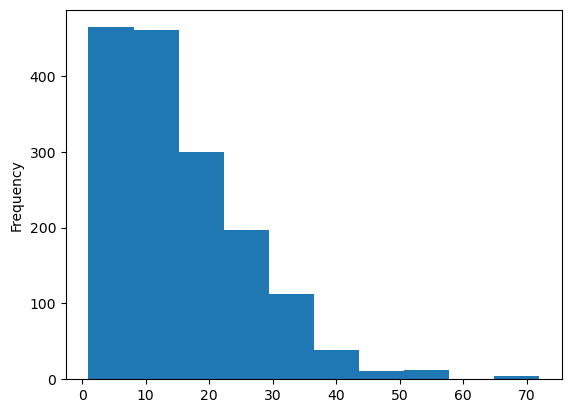

In [18]:
df['free sulfur dioxide'].plot.hist()

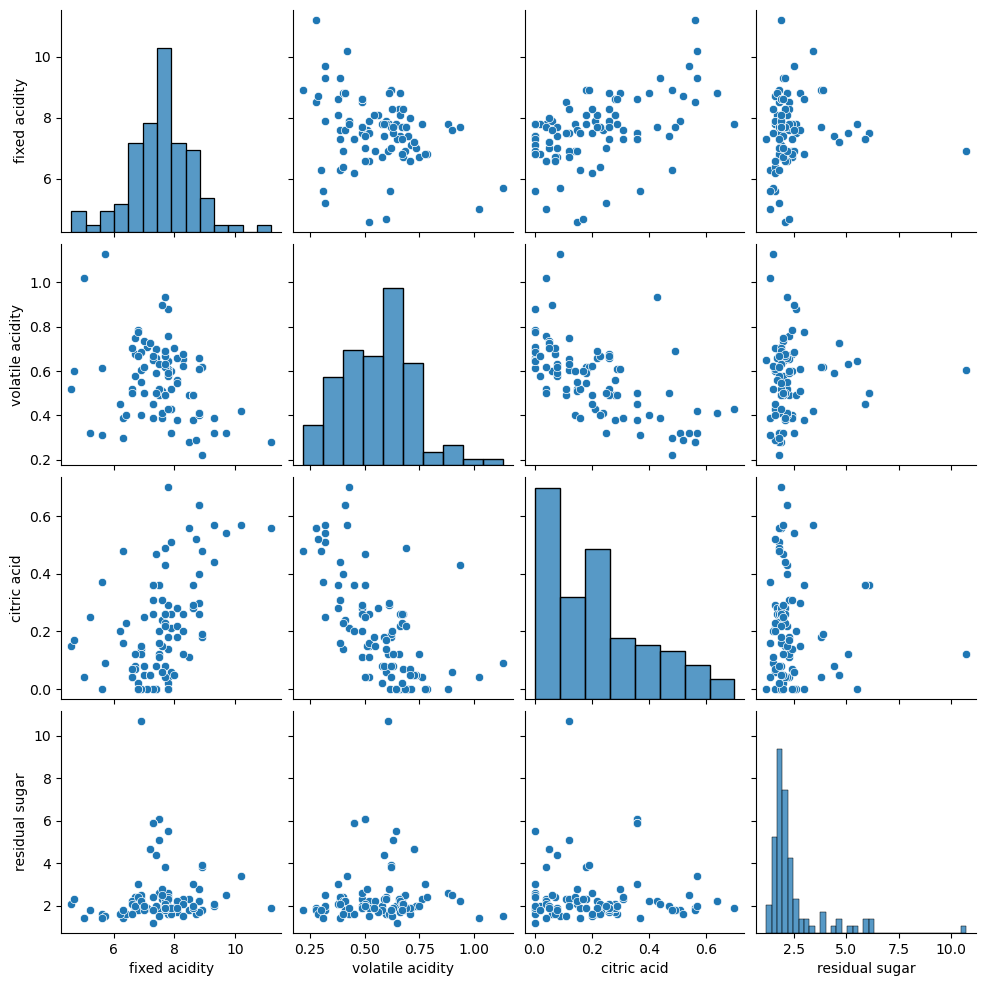

In [8]:
import seaborn

seaborn.pairplot(df.iloc[:100, :4])

LinearRegression()

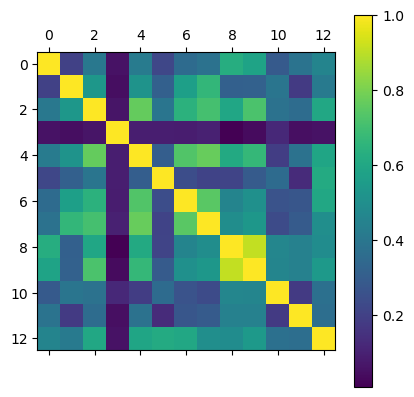

In [96]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = df.loc[:, df.columns != 'medv']
y = df['medv']

import matplotlib.pyplot as plt

r = plt.matshow(X.corr().abs())
plt.colorbar(r)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45)

reg.fit(X_train, y_train)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing


X = df.loc[:, df.columns != 'quality']
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=46)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = linear_model.LogisticRegression().fit(X_train_scaled, y_train)

In [123]:
clf.score(X_train_scaled, y_train)

0.6075058639562158

In [124]:
clf.score(X_test_scaled, y_test)

0.58125

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
